<a href="https://colab.research.google.com/github/lasyaEd/dsba6122-summer2024/blob/main/notebooks/Lab4PiML_edunuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install piml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 21.5 MB

In [1]:
import pandas as pd
from piml import Experiment
from piml.models import XGB2Classifier
import matplotlib.pyplot as plt

exp = Experiment()
data = pd.read_csv('https://github.com/shrutibalan4591/South-German-Credit-Risk-Classification/raw/main/Data/German_credit.csv')

exp.data_loader(data=data)
exp.data_summary(feature_exclude=["amount", "savings", "employment_duration", "personal_status_sex", "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker"], silent=True)
exp.data_prepare(target="credit_risk", task_type="classification", silent=True)

# Train Model without monotonicity
exp.model_train(model=XGB2Classifier(), name='XGB2')

# Train Model with monotonicity constraints on duration
exp.model_train(model=XGB2Classifier(mono_decreasing_list=("duration", )), name="Mono-XGB2")

(CVXPY) Jun 18 03:13:03 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 18 03:13:03 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


Plotting PDPs for all features using both train and test data. Saving these plots as JPGs.


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

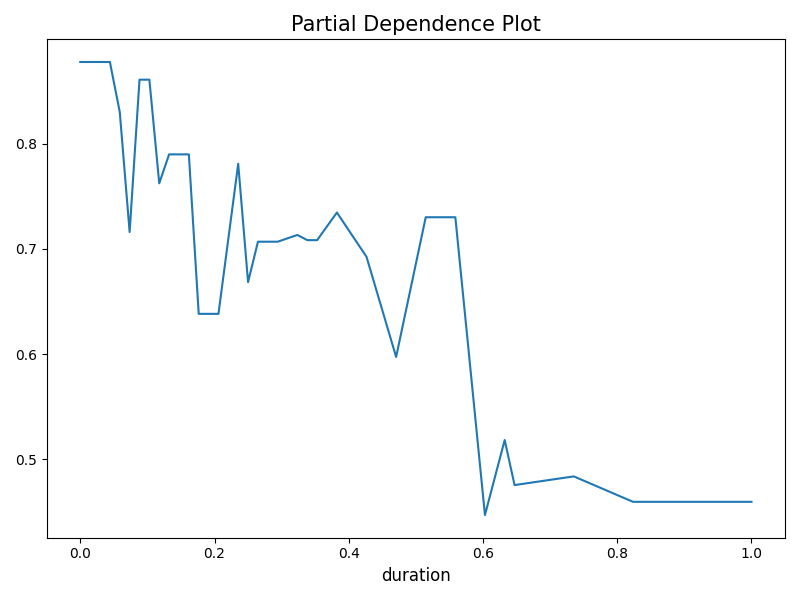

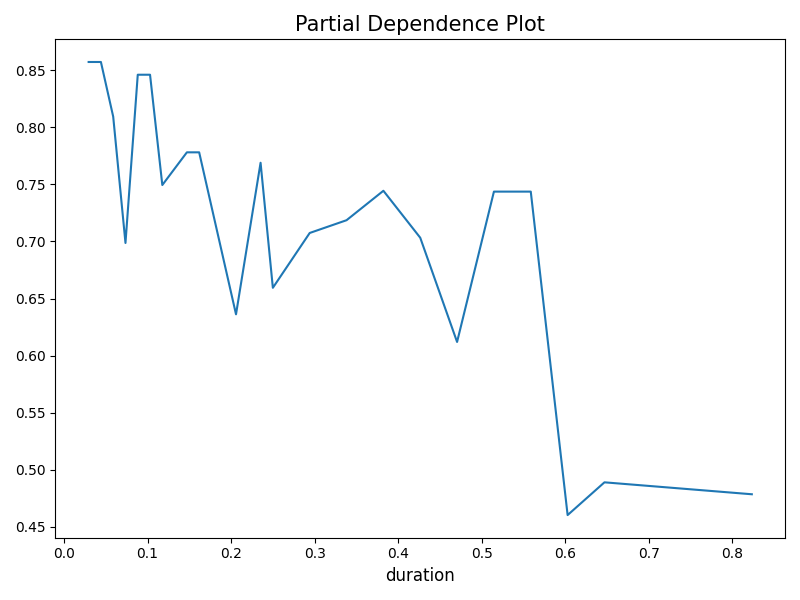

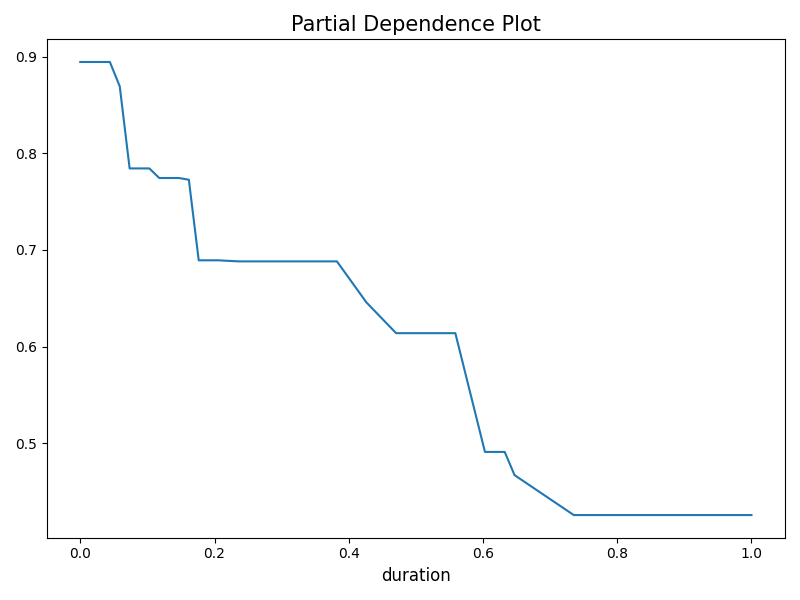

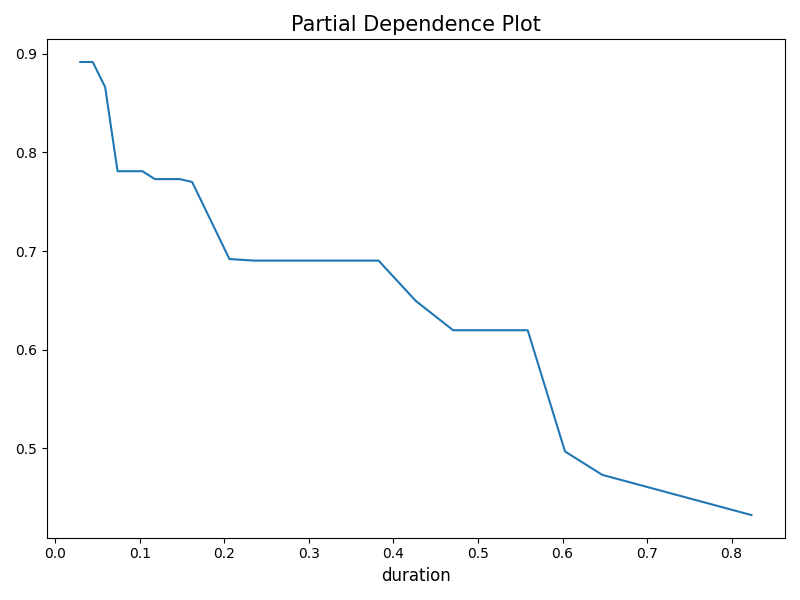

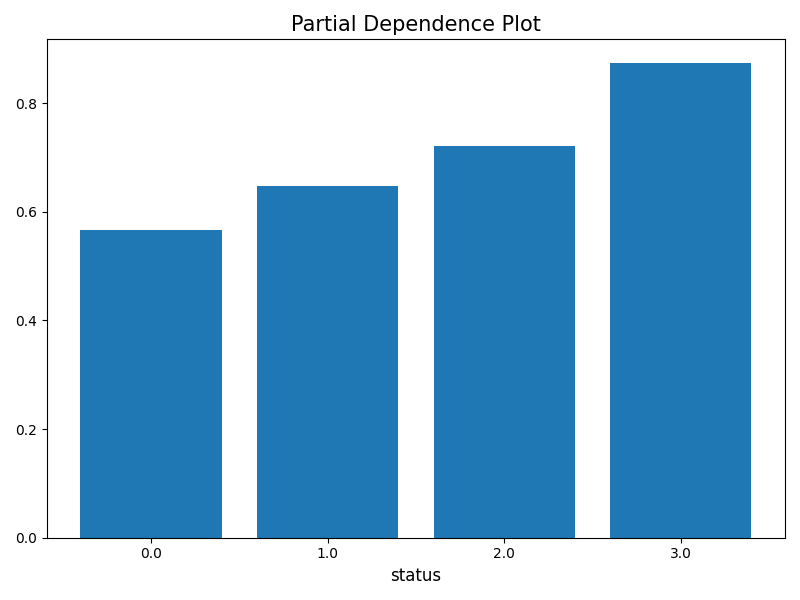

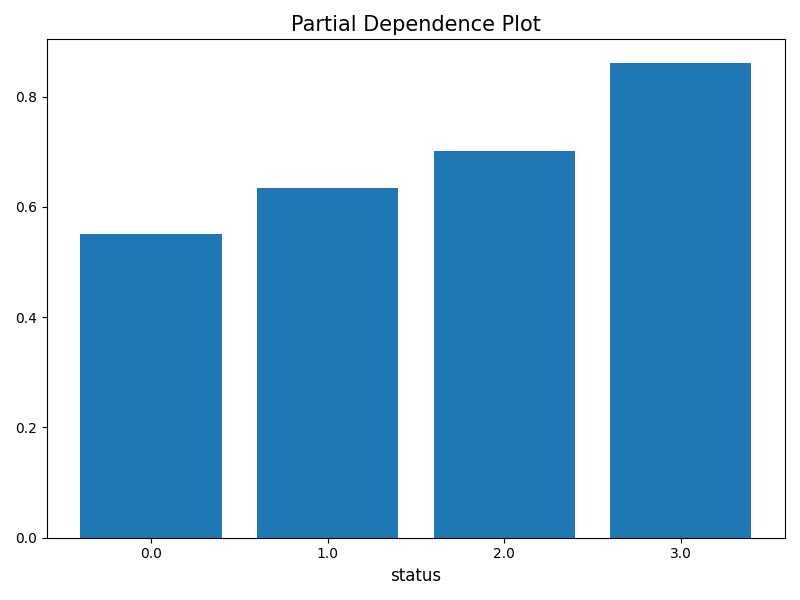

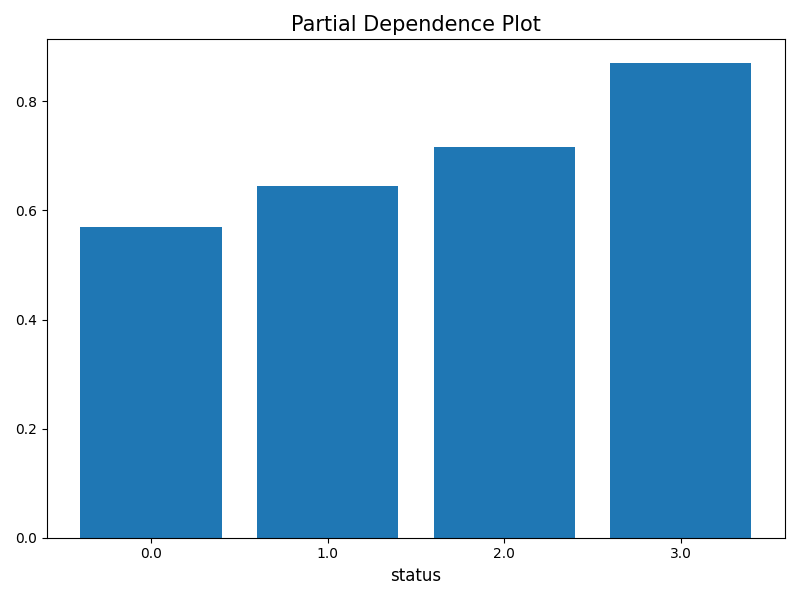

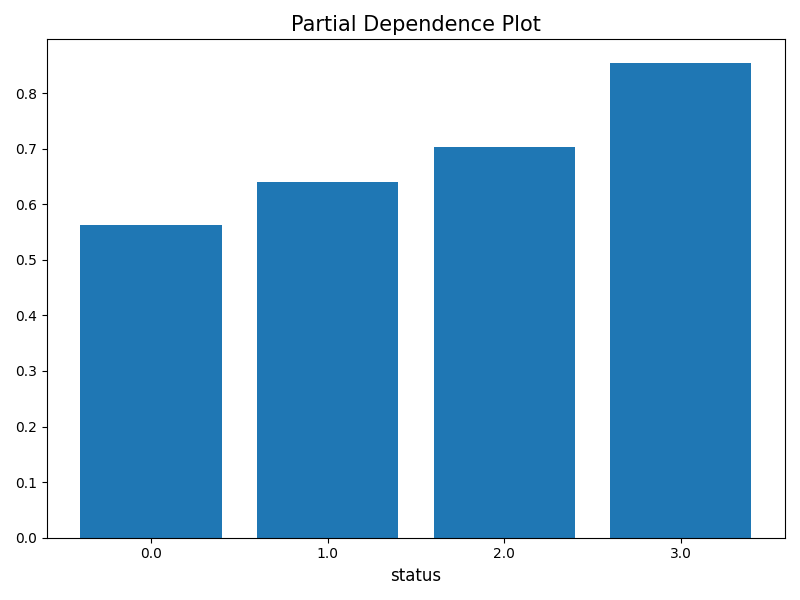

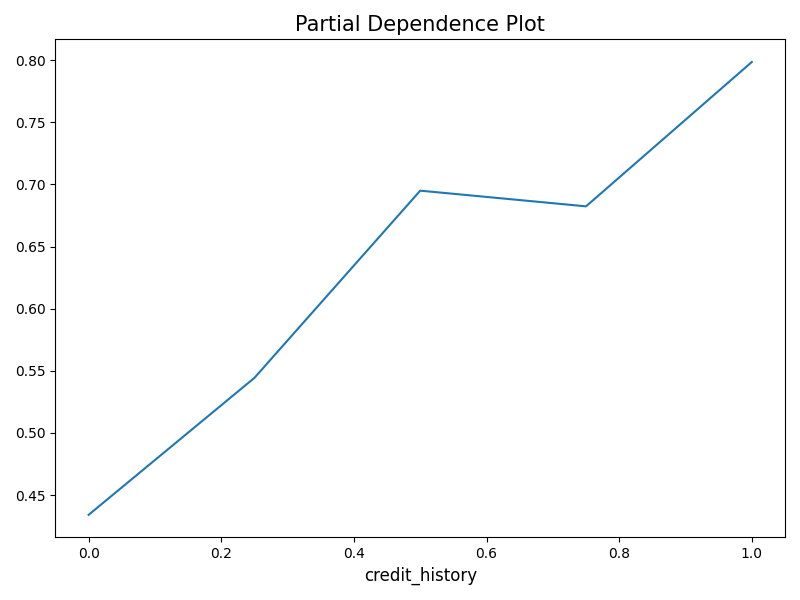

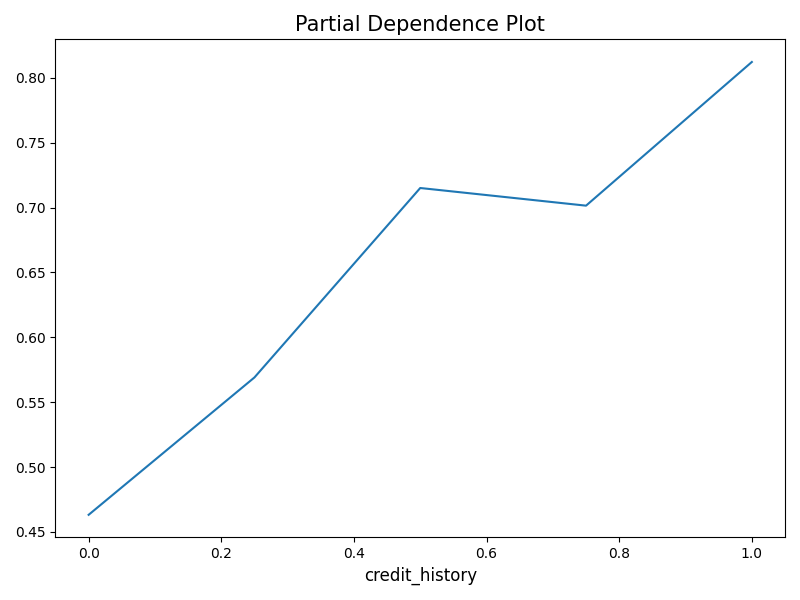

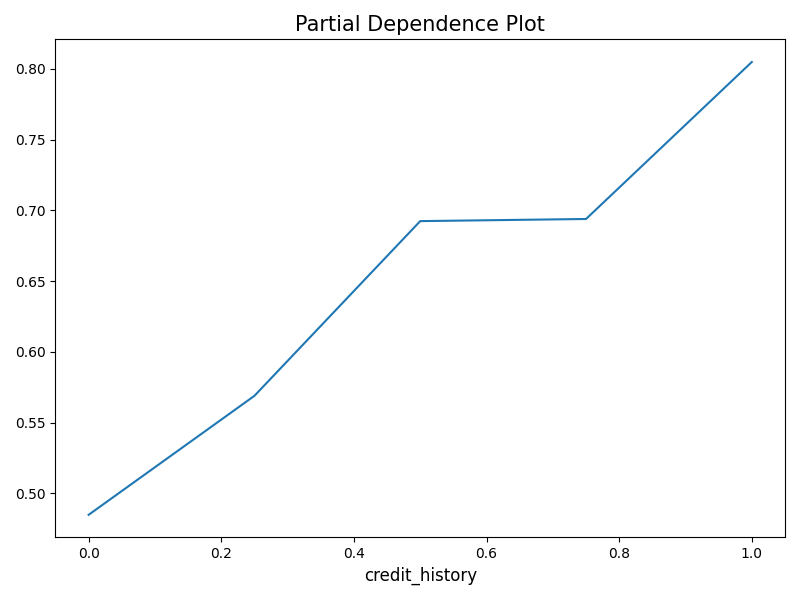

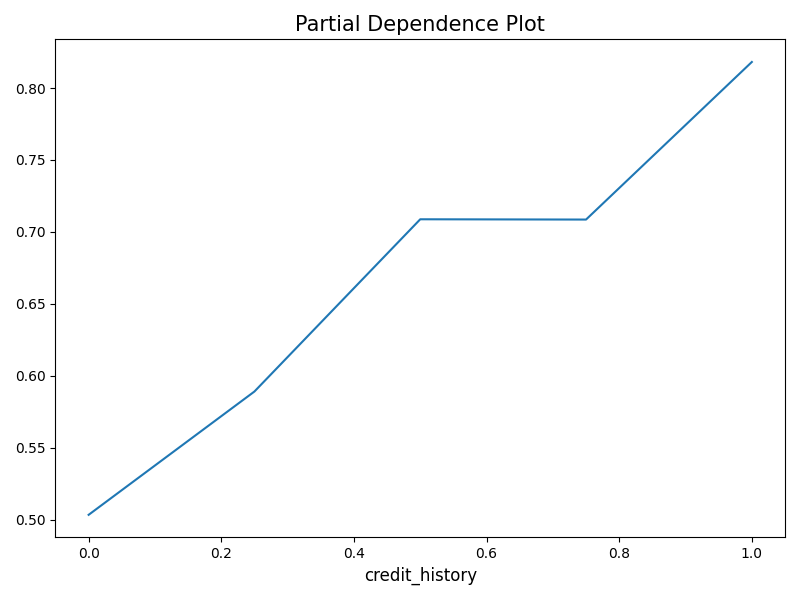

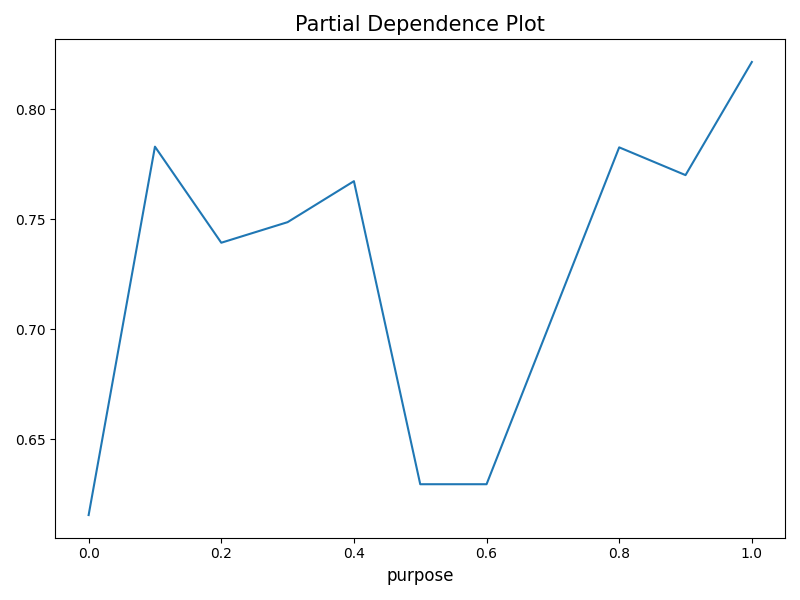

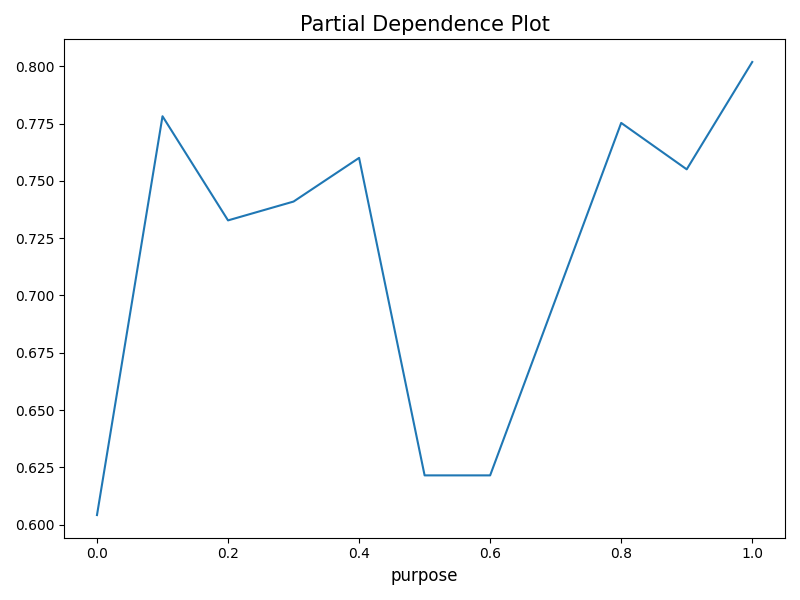

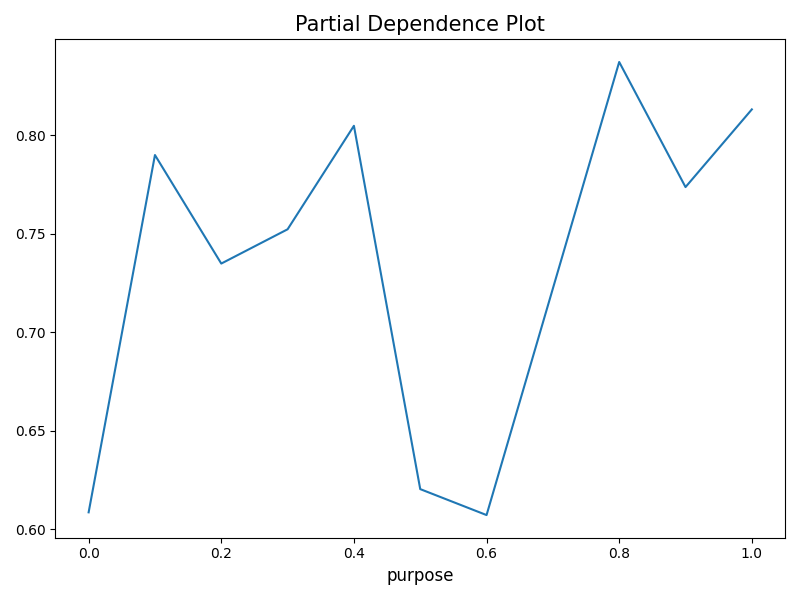

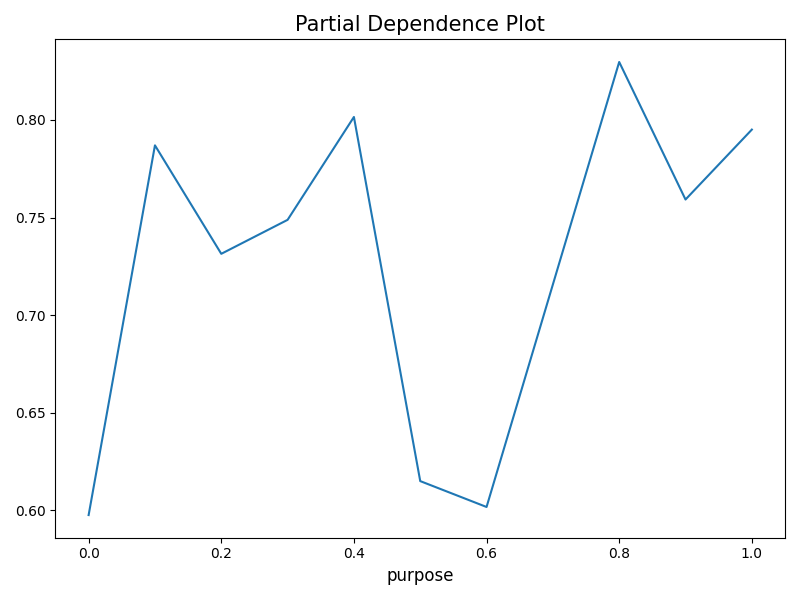

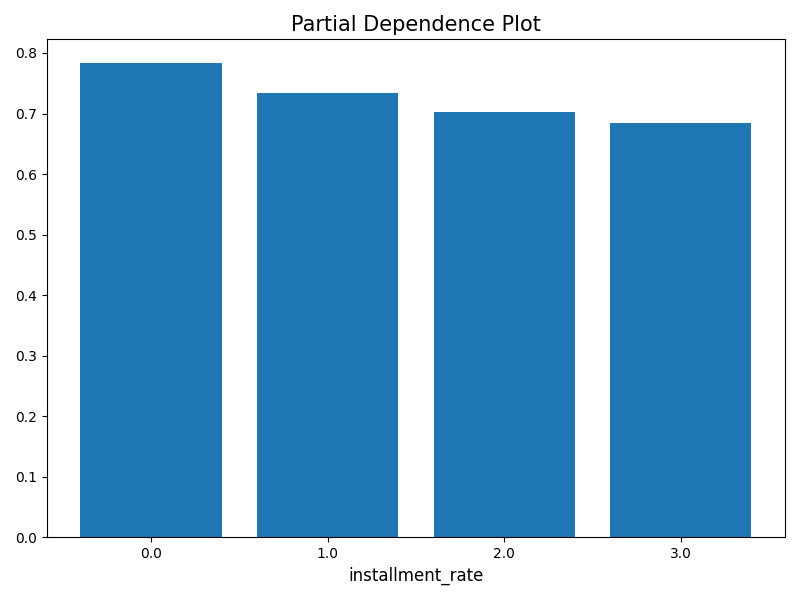

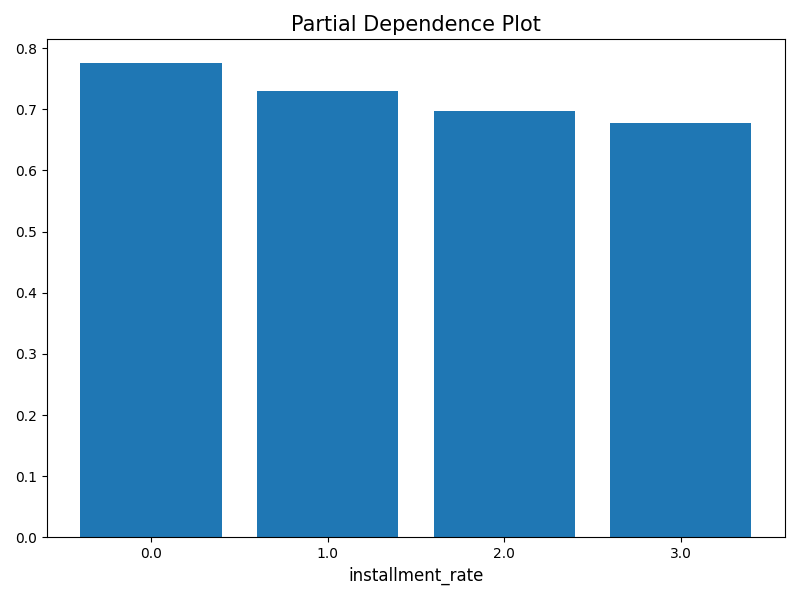

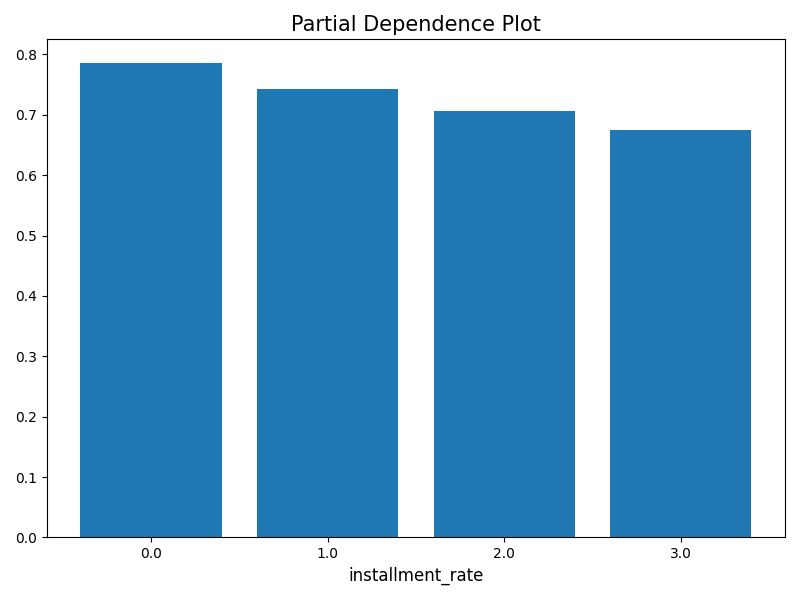

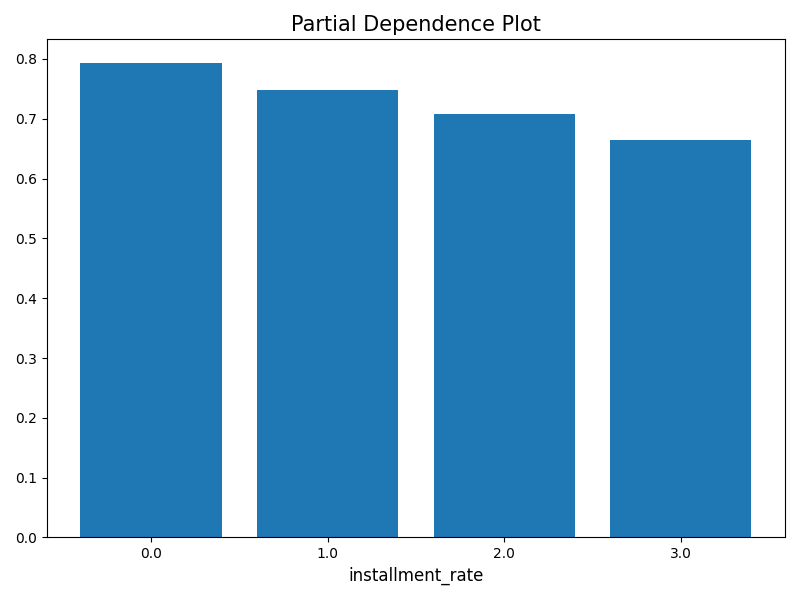

In [2]:
# Function to extract and plot PDPs for both models on the same graph
def plot_pdp_combined(exp, feature):
    # Get PDP data for XGB2 and Mono-XGB2 for both train and test data
    pdp_xgb2_train = exp.model_explain(model="XGB2", show="pdp", uni_feature=feature, use_test=False, return_data=True).data
    pdp_xgb2_test = exp.model_explain(model="XGB2", show="pdp", uni_feature=feature, use_test=True, return_data=True).data
    pdp_mono_xgb2_train = exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature=feature, use_test=False, return_data=True).data
    pdp_mono_xgb2_test = exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature=feature, use_test=True, return_data=True).data

    # Extract PDP values
    values_xgb2_train = pdp_xgb2_train
    values_xgb2_test = pdp_xgb2_test
    values_mono_xgb2_train = pdp_mono_xgb2_train
    values_mono_xgb2_test = pdp_mono_xgb2_test

    # Plot the PDPs on the same graph
    fig, ax = plt.subplots(figsize=(8, 6))

    # Training data plots
    ax.plot(values_xgb2_train[feature], values_xgb2_train['values'], label='XGB2 (Train)', color='blue', linestyle='-')
    ax.plot(values_mono_xgb2_train[feature], values_mono_xgb2_train['values'], label='Mono-XGB2 (Train)', color='red', linestyle='--')

    # Test data plots
    ax.plot(values_xgb2_test[feature], values_xgb2_test['values'], label='XGB2 (Test)', color='purple', linestyle='-', alpha=0.7)
    ax.plot(values_mono_xgb2_test[feature], values_mono_xgb2_test['values'], label='Mono-XGB2 (Test)', color='green', linestyle='--', alpha=0.7)

    ax.set_xlabel(feature)
    ax.set_ylabel('Partial Dependence')
    ax.set_title(f'Partial Dependence of {feature}')
    ax.legend()

    # Save plot as JPG
    fig.savefig(f'{feature}_pdp.jpg', dpi=300)  # dpi parameter controls image resolution
    plt.close(fig)  # Close the figure to free up memory

# List of features to plot
features = ["duration", "status", "credit_history", "purpose", "installment_rate"]

# Plot combined PDPs for each feature
for feature in features:
    plot_pdp_combined(exp, feature)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

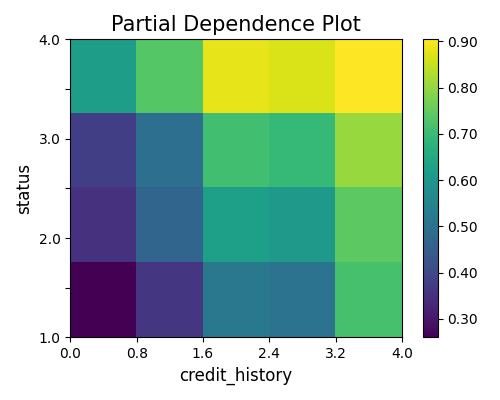

In [ ]:
exp.model_explain(model="XGB2", show="pdp", bi_features=["credit_history", "status"],
                  grid_size=10, sample_size=10000, sliced_line=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

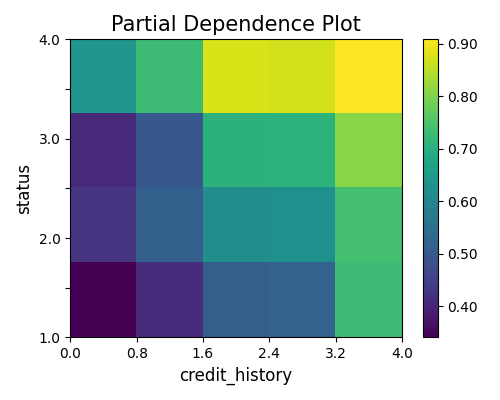

In [ ]:
exp.model_explain(model="Mono-XGB2", show="pdp", bi_features=["credit_history", "status"],
                  grid_size=10, sample_size=10000, sliced_line=False, original_scale=True, figsize=(5, 4))

# PDPs: Interpreting the plots (0.5 points)
Partial Dependency Plots (PDPs) are a tool used in machine learning to visualize the relationship between a set of features and the predicted outcome of a model. PDPs show how the predicted outcome changes as the feature of interest changes, while keeping all other features constant. This helps in understanding the marginal effect of a feature on the model’s predictions.

**Duration:**  The Mono-XGB2 model, with its monotonic constraint, offers a more regularized and potentially more generalizable relationship between duration and the predicted credit risk. The XGB2 model, while capturing more complex interactions, may be more prone to overfitting.

**Status:** It has an upward trend with two gradients indicating different rates of increase in credit risk at different status levels. Both the models have the same trend.

**Purpose:** This feature has a complex impact on credit risk and varies significantly across different values of purpose. For the XGB2 model, the larger distance between the lines of train and test sets indicates that there is a greater discrepancy between how the model performs on training data versus test data. This can be a sign of overfitting, where the model fits the training data very well but does not generalize as effectively to new, unseen data. For the Mono-XGB2 model, the smaller distance between the train and test lines suggests better generalization. The model's performance is more consistent across both training and test data, indicating less overfitting.

**Installment rate:** The smooth downward trend in the PDP for installment rate in Mono-XGB2 suggests a clear and consistent relationship where increasing the installment rate decreases the predicted credit risk. The PDP for the XGB2 model shows a downward trend but with three distinct gradients. This means that the effect of the installment rate on the predicted credit risk changes at different points, suggesting more complex interactions between this feature and the target variable.

**Credit history:** The PDPs for credit_history in both models show complex, non-linear relationships with predicted credit risk.

# Accuracy



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8013,0.8453,0.8674,0.4305,0.1399
Test,0.7400,0.7827,0.8207,0.5341,0.1751
Gap,-0.0613,-0.0626,-0.0467,0.1036,0.0352


,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.7762,0.8201,0.8515,0.4573,0.1507
Test,0.7700,0.7815,0.8414,0.5283,0.1726
Gap,-0.0062,-0.0387,-0.0101,0.0710,0.0219


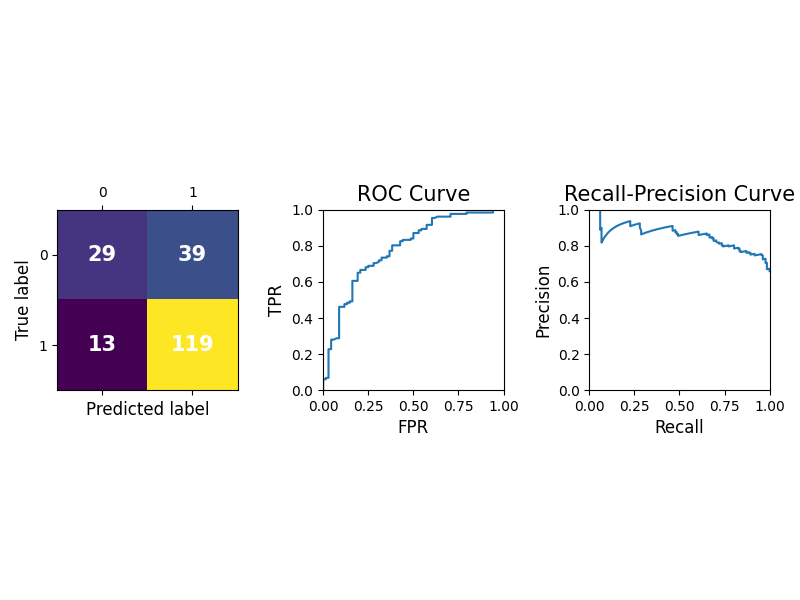

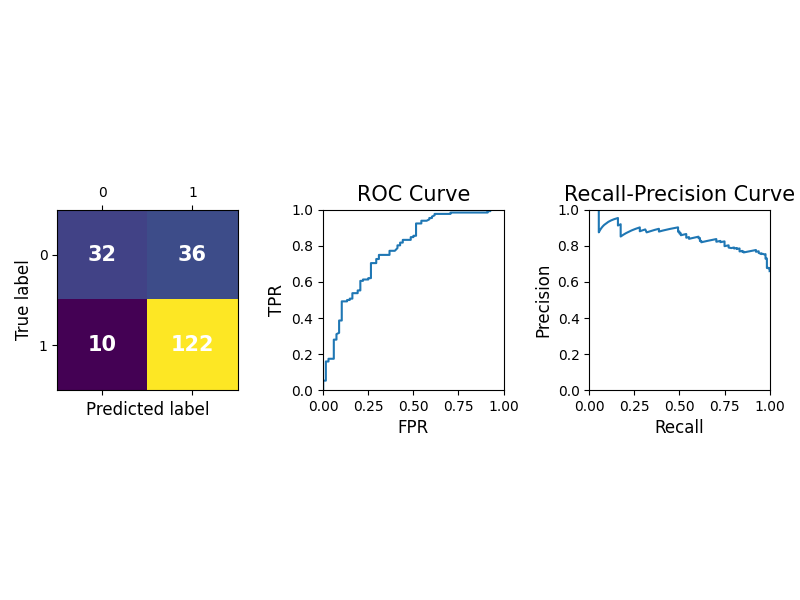

In [3]:
exp.model_diagnose(model="XGB2", show="accuracy_table")
exp.model_diagnose(model="Mono-XGB2", show="accuracy_table")
exp.model_diagnose(model="XGB2", show="accuracy_plot")
exp.model_diagnose(model="Mono-XGB2", show="accuracy_plot")


We always aim to minimise log loss. Lower log loss values indicate more accurate and reliable predictions. Mono-XGB2 has a lower test log loss (0.5283) compared to XGB2 (0.5341), indicating that Mono-XGB2 performs slightly better on unseen data.

Higher F1 scores indicate better model performance in terms of both precision and recall. Mono-XGB2's F1 score is slightly better than XGB2's. XGB2 model's drop in F1 score when using train vs test data is bigger than that of Mono-XGB2's.

Model 1's Training AUC is 0.8453, dropping to 0.7827 on the test data, with a gap of -0.0626.
Model 2's Training AUC is 0.8201, and the test AUC is 0.7815, with a smaller gap of -0.0387. Even though XGB2's AUC is slightly higher we can observe a gap of -0.0626 indicating a noticeable drop in performance when moving from training to test data whereas the Mono-XGB2 has a smaller gap of -0.0387 suggests better generalization and more consistent performance across training and test data.


Overall, Model 1 performs well on training data across all metrics but has larger gaps between training and test data, indicating potential overfitting. Model 2, with monotonic constraints on duration, has slightly lower training performance but much smaller gaps between training and test data, suggesting better generalization and less overfitting.

# Residual Plots

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

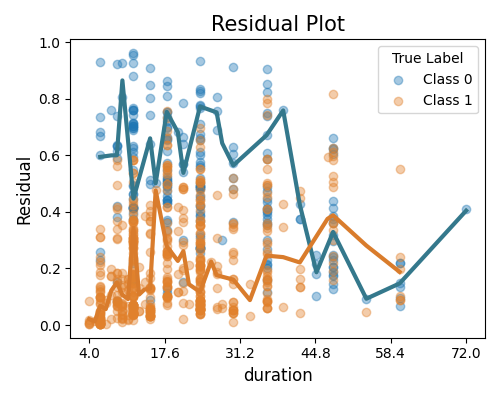

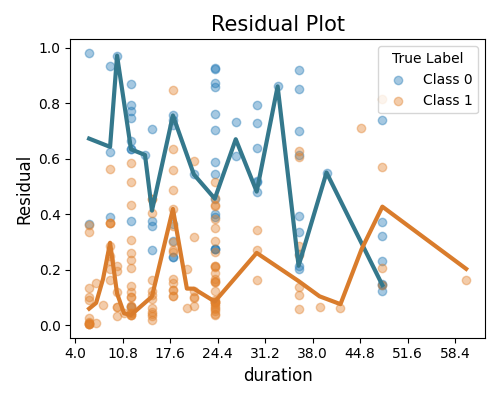

In [7]:
import matplotlib.pyplot as plt

exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="duration",
                   use_test=False, original_scale=True, figsize=(5, 4))
exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="duration",
                   use_test=True, original_scale=True, figsize=(5, 4))

First thing to keep in mind is that the scaling is different for both train residual plot and test residual plot for both the models, Its because the data is divided into inequal proportions. The plots don't follow a pattern, there is no clear trend. We can notice that the errors in test daset are a little higher than th errors in training dataset.  

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

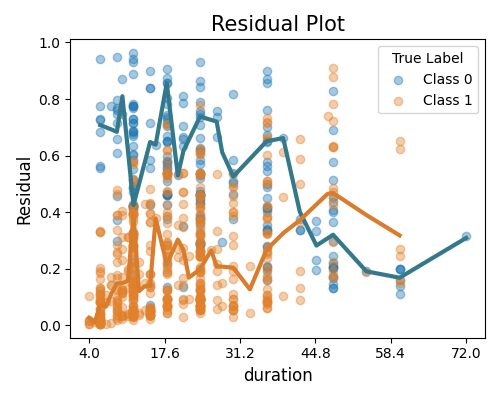

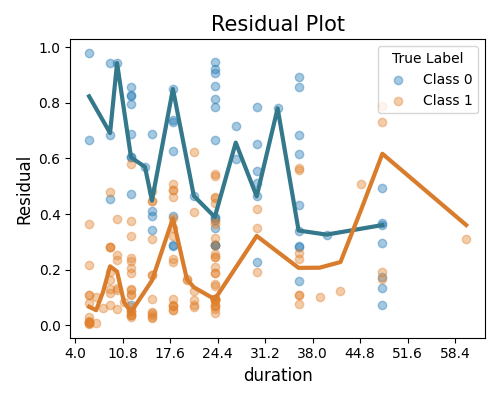

In [9]:
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="duration",
                   use_test=False, original_scale=True, figsize=(5, 4))
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="duration",
                   use_test=True, original_scale=True, figsize=(5, 4))

With a monotonic constraint on "duration," the residual plots show reduced variability. The plots don't follow a pattern and we can notice that the errors in test daset are a little higher than th errors in training dataset but it is a little better than XGB2 Model.

# Overfit

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

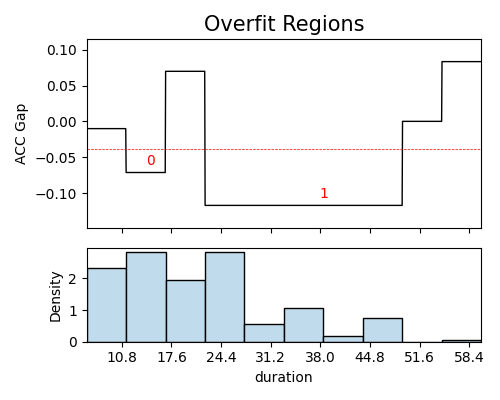

,[duration,duration),#Test,#Train,test_ACC,train_ACC,Gap
0,0.108824,0.188235,45,208,0.755556,0.826923,-0.071368
1,0.267647,0.664706,86,312,0.674419,0.791667,-0.117248


In [ ]:
results = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["duration"], threshold=1.05, min_samples=20,
                             use_test=True, original_scale=True, return_data=True, figsize=(5, 4))
results.data

For Model XGB2, index 0, the gap between test_ACC and train_ACC is -0.071368 and for index 1, the gap between test_ACC and train_ACC is -0.117248. This negative gap suggests that the model performs slightly worse on the test set compared to the training set for instances with this "duration" interval. It indicates some level of overfitting, though the difference is not substantial.
The gaps between test_ACC and train_ACC are negative in both cases, indicating that the model's performance deteriorates when applied to unseen data.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

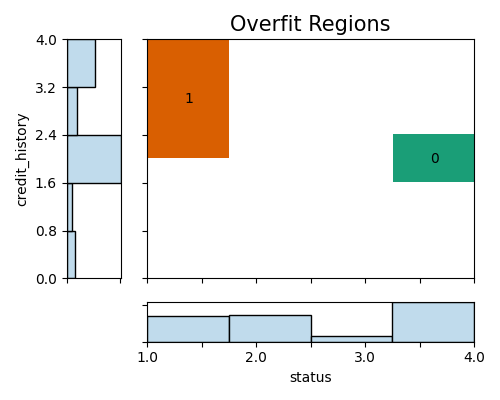

,[status,status),[credit_history,credit_history),#Test,#Train,test_ACC,train_ACC,Gap
0,2.25,3.00,0.4,0.6,39,148,0.769231,0.905405,-0.136175
1,0.00,0.75,0.5,1.0,42,197,0.595238,0.776650,-0.181412


In [ ]:
results = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["status","credit_history"], threshold=1.05, min_samples=20,
                             use_test=True, original_scale=True, return_data=True, figsize=(5, 4))
results.data

The XGB2 model exhibits varying degrees of overfitting across different slices defined by "status" and "credit_history". In both slices, the training accuracy consistently outperforms the test accuracy, with gaps of -13.62% and -18.14% respectively. This disparity suggests that while the model performs well on the training data, it struggles to generalize to new, unseen data points. Slice 0 shows a relatively lower gap, indicating milder overfitting, whereas slice 1 demonstrates more significant overfitting.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

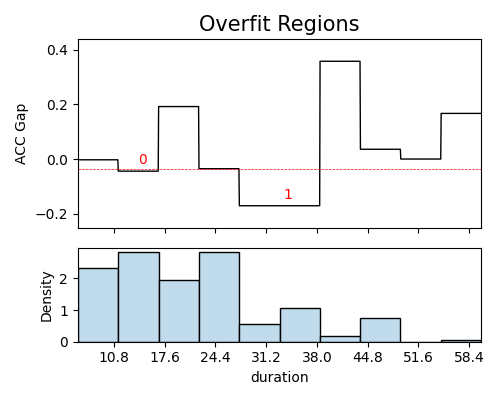

,[duration,duration),#Test,#Train,test_ACC,train_ACC,Gap
0,0.108824,0.188235,45,208,0.777778,0.822115,-0.044338
1,0.347059,0.505882,26,103,0.576923,0.747573,-0.170650


In [ ]:
results = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["duration"], threshold=1.05, min_samples=20,
                             use_test=True, original_scale=True, return_data=True, figsize=(5, 4))
results.data

For index 0, the gap between test and training accuracy (test_ACC - train_ACC) is -0.044338 (-4.43%). This negative gap indicates that the model performs slightly worse on the test set compared to the training set for instances with this "duration" interval.
For index 1, the gap between test and training accuracy (test_ACC - train_ACC) is -0.170650 (-17.07%). This larger negative gap indicates more pronounced overfitting for this "duration" interval, where the model significantly underperforms on the test set compared to the training set.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

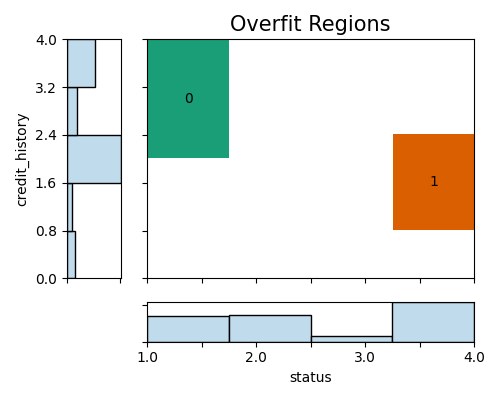

,[status,status),[credit_history,credit_history),#Test,#Train,test_ACC,train_ACC,Gap
0,0.00,0.75,0.5,1.0,42,197,0.642857,0.725888,-0.083031
1,2.25,3.00,0.2,0.6,40,156,0.775000,0.897436,-0.122436


In [ ]:
results = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["status","credit_history"], threshold=1.05, min_samples=20,
                             use_test=True, original_scale=True, return_data=True, figsize=(5, 4))
results.data

While both models demonstrate overfitting, the XGB2 model has slightly larger negative gaps across the features analysed.

# Weakspot

> The weakspot analysis focuses on identifying areas where the model performs relatively poorly or where there is a notable gap between training and test accuracies within the specified slice of the selected feature.



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

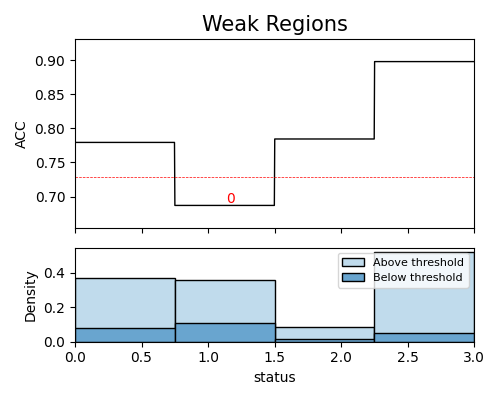

,[status,status),#Test,#Train,test_ACC,train_ACC,Gap
0,0.75,1.5,55,214,0.672727,0.686916,-0.014189


In [16]:
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["status"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
results.data

Both training and test accuracies are relatively close, indicating that the model's performance in terms of accuracy is consistent across both datasets.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

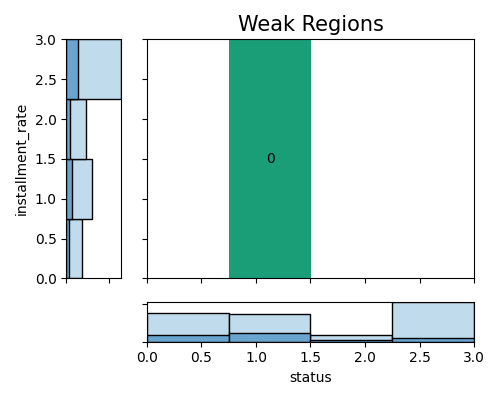

,[status,status),[installment_rate,installment_rate),#Test,#Train,test_ACC,train_ACC,Gap
0,0.75,1.5,0.0,3.0,55,214,0.672727,0.686916,-0.014189


In [10]:
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["status","installment_rate"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
results.data

In the slice defined by status values between 0.75 and 1.5, and installment_rate values between 0.0 and 3.0, Both training and test accuracies are relatively close indicating that the model's performance in terms of accuracy is consistent across both datasets. No weak regions detected for other features.

In [ ]:
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["status","installment_rate"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

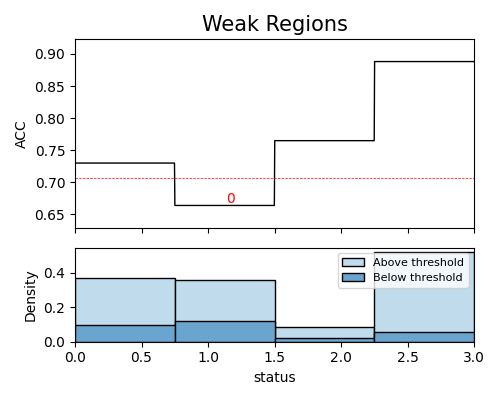

,[status,status),#Test,#Train,test_ACC,train_ACC,Gap
0,0.75,1.5,55,214,0.727273,0.663551,0.063721


In [19]:
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["status"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
results.data

This analysis indicates that within the specified slice of data defined by "status", the Mono-XGB2 model with a monotonic constraint on "duration" performs reasonably well. The positive gap between training and test accuracies suggests that the model's performance on unseen data is slightly better than on the training data. Need to look for data leakage and increase the size of my training and test datasets.

#### Make a decision which model do you think you should use; provide justification and make your case. (0.5 points)

I think i'll use "Mono-XGB2". The F1 scores suggest that Mono-XGB2 is slighly better than XGB2. The residual plots of Mono-XGB2 for duration has less variability but also maintains not having a pattern. Its test residual plot shows smaller residuals compared to its trainig residual plot. The overfit analysis suggest that XGB2 model has more pronounced overfitting in few regions compared to the Mono-XGB2.